<a href="https://colab.research.google.com/github/59822/Kmeans/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Problem Segmentation for bank

 ## Objetivos con el Dataset de Mall Customers
El objetivo principal es segmentar a los clientes en diferentes grupos según su comportamiento de compra, lo que puede ayudar a un negocio a tomar mejores decisiones de marketing y ventas.

🔍 Objetivos específicos:
Identificar patrones de comportamiento de los clientes

¿Existen clientes que gastan mucho pero tienen ingresos bajos?
¿Hay clientes jóvenes con hábitos de gasto distintos a los mayores?
¿Se pueden detectar clientes "premium" y clientes "ocasionales"?
Optimizar estrategias de marketing

Crear campañas personalizadas según el tipo de cliente
Enviar promociones a los grupos que realmente las necesitan
Ajustar precios y ofertas según los segmentos
Mejorar la experiencia del cliente

Personalizar recomendaciones en función del grupo al que pertenece cada cliente
Ofrecer mejores servicios para los clientes de alto valor
Tomar mejores decisiones de negocio

Ubicación de nuevos puntos de venta según los grupos más rentables
Adaptar inventarios a los hábitos de compra detectados

'''

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)



100%|██████████| 1.55k/1.55k [00:00<00:00, 1.96MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


In [4]:
import os
import shutil

fil = os.path.basename(path)
ruta = '/content/' + fil

if not os.path.exists(ruta):
  shutil.move(path, ruta)
  print("It's succesfully moved")

else:
  print("Is already moved!")

It's succesfully moved


In [5]:
dt = pd.read_csv("/content/1/Mall_Customers.csv")
dt

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
dt.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
dt.drop(columns = ['CustomerID'], axis = 1, inplace= True
        )

In [18]:
dt.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [9]:
media_age = np.mean(dt['Age'])
mediana_edad = np.median(dt['Age'])

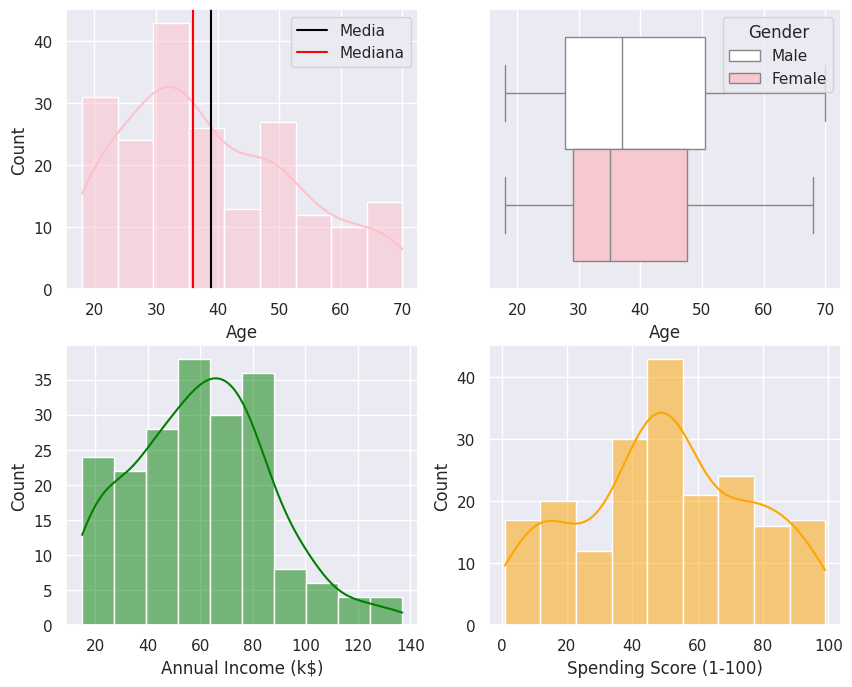

In [10]:
# Eda for numerical variables
## Age, Annual Income, Spendinc Score

sns.set(style = 'darkgrid')
fig, axis = plt.subplots(2, 2, figsize=(10,8))
sns.histplot(data = dt, x = "Age", kde = True, ax = axis[0,0], color = "Pink")
axis[0,0].axvline(media_age,color = 'black', label = "Media")
axis[0,0].axvline(mediana_edad ,color = 'red', label = "Mediana")



# Observación del comportamiento de la edad
sns.boxplot(data=dt, x="Age", hue="Gender", palette={"Male": "white", "Female": "pink"}, ax=axis[0, 1])
sns.histplot(data = dt, x = "Annual Income (k$)", kde = True, ax = axis[1,0], color = "green")
sns.histplot(data = dt, x = 'Spending Score (1-100)', kde = True, ax = axis[1,1], color = "orange");
axis[0,0].legend()
plt.show()


<Axes: ylabel='Spending Score (1-100)'>

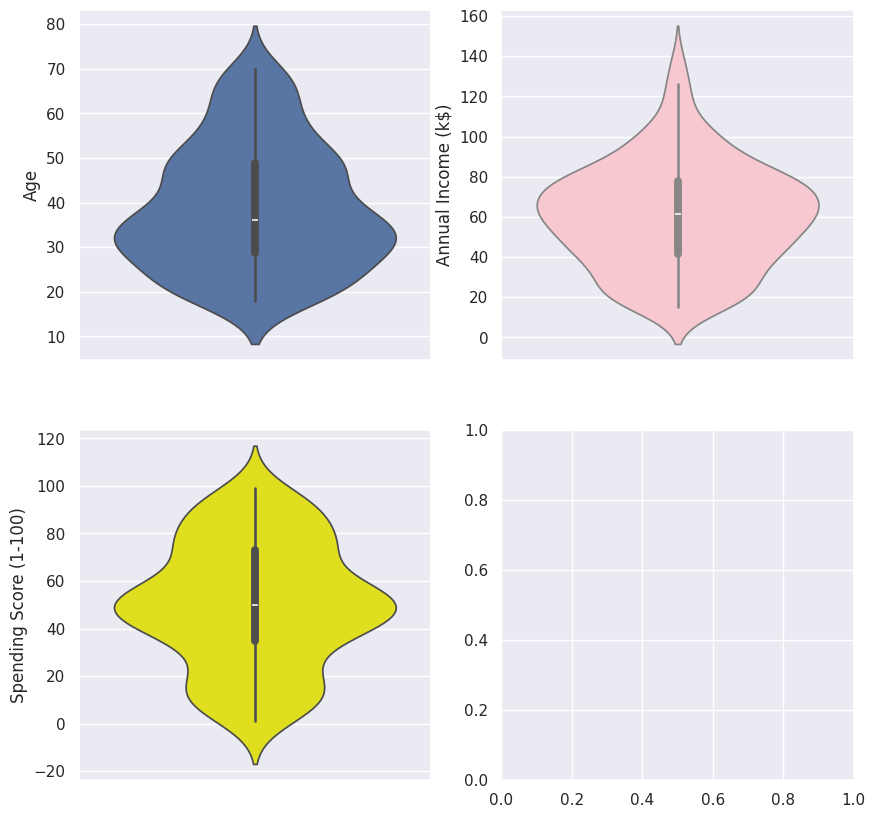

In [11]:
sns.set(style = "darkgrid")
fig, axs = plt.subplots(2,2, figsize = (10,10))

sns.violinplot(data = dt, y = "Age", ax = axs[0,0])

sns.violinplot(data = dt, y = "Annual Income (k$)", ax = axs[0,1], color = 'pink')

sns.violinplot(data = dt, y = "Spending Score (1-100)", ax = axs[1,0], color = "yellow")


## Age =

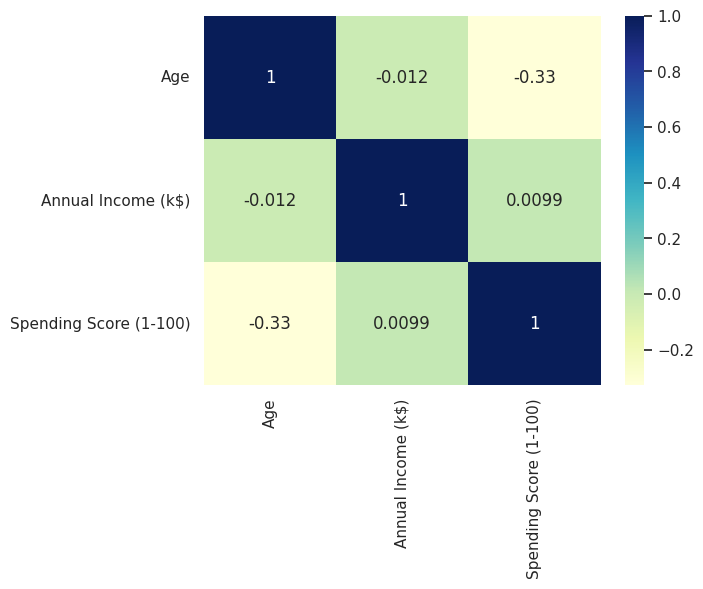

In [12]:
col_include = [col for col in dt.columns if col != "Gender"]



corr = dt[col_include].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

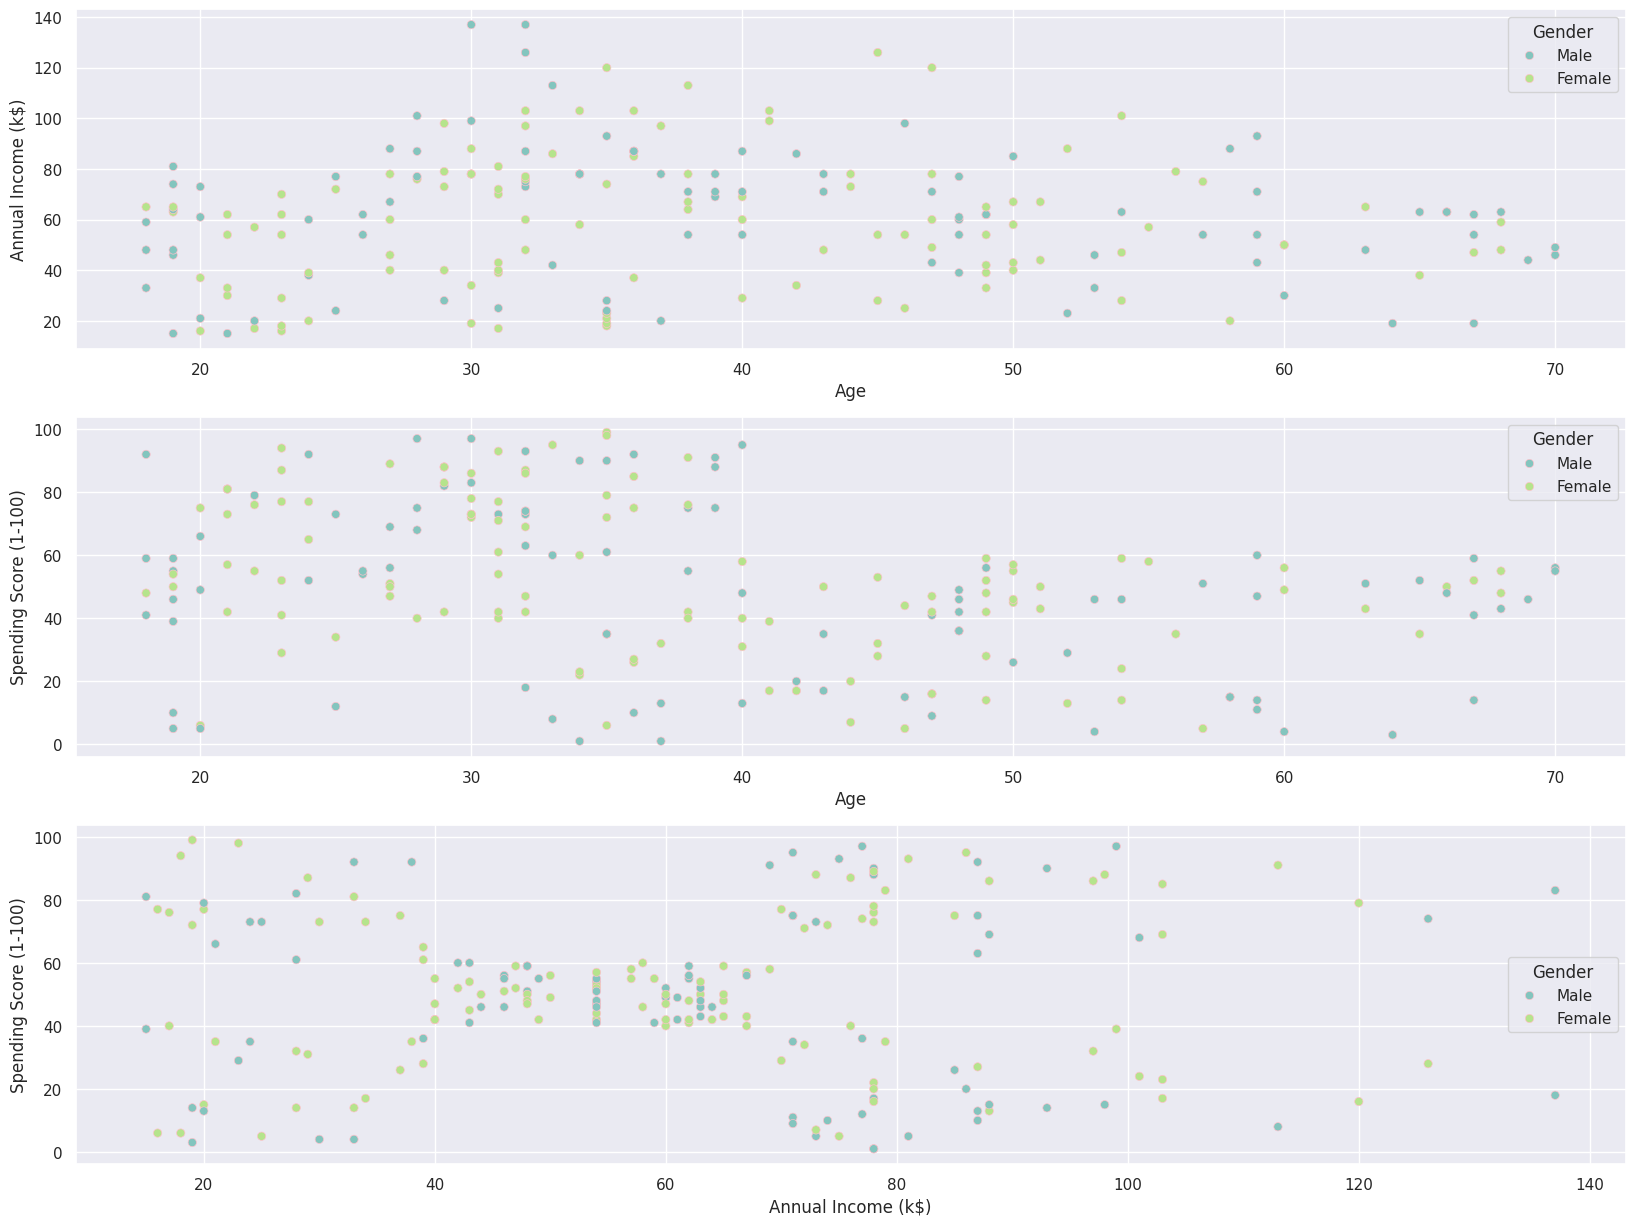

In [13]:
a = 0
colors = ["#83c5be" , "#b5e48c"]
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (20,15))
for i in range(len(col_include) -1):
  for j in range(len(col_include)):
    if i != j and j > i:
      a +=1
      plt.subplot(3,1,a)
      sns.scatterplot( x = col_include[i], y = col_include[j], data = dt, hue  = 'Gender',
                      palette = colors, edgecolor = "Pink")


<Axes: >

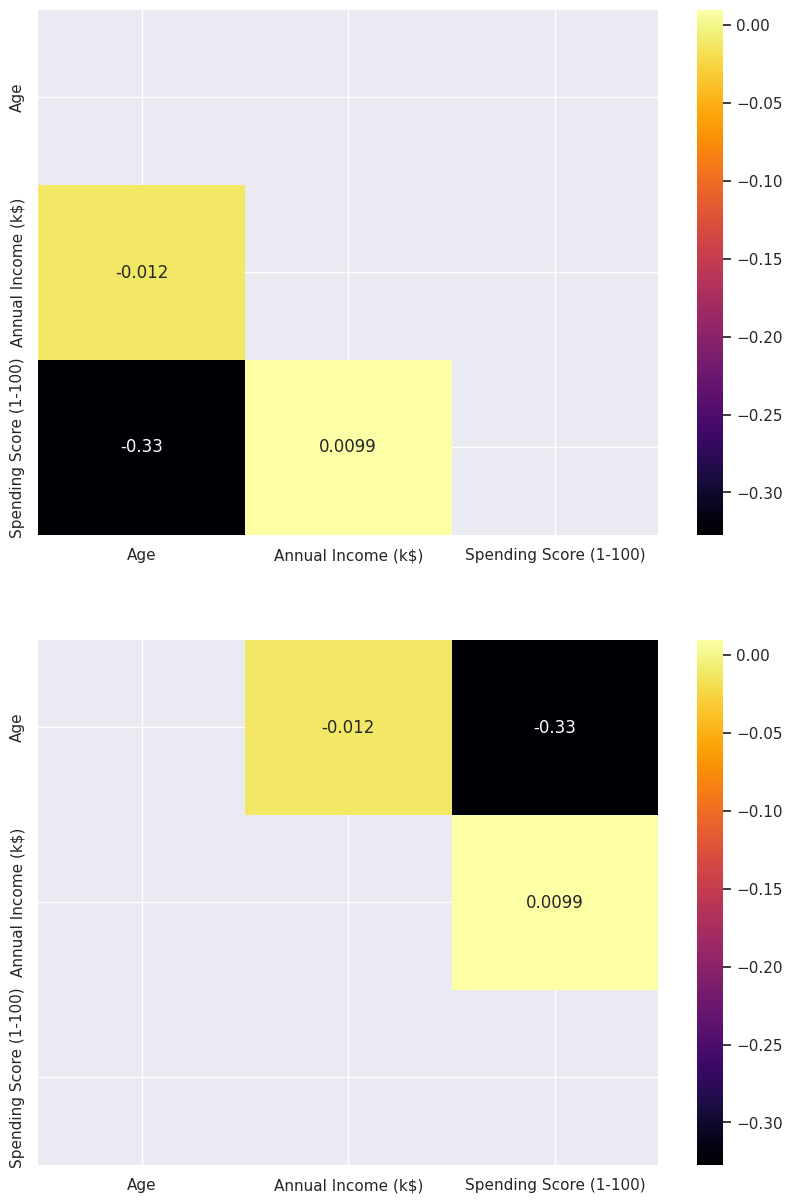

In [14]:
# Feature emgomeeromg

up_tringle = np.triu(corr)
low_triange = np.tril(corr)



fig,ax = plt.subplots(nrows = 2, ncols = 1,figsize = (10,15))
plt.subplot(2,1,1)
sns.heatmap(mask = up_tringle, data = corr, cmap = "inferno",   annot = True, cbar = 'tRUE')


plt.subplot(2,1,2)
sns.heatmap(mask = low_triange, data = corr, cmap = "inferno",   annot = True, cbar = 'tRUE')

### Se observa una única correlación en la edad and Spending Score, by the same way, is important to observer that there is not an correlation with others, neither posive or negative

In [17]:
## Data Sacling


from sklearn.preprocessing import MinMaxScaler, StandardScaler

MinMax = MinMaxScaler()
SS = StandardScaler()

dt_2 = dt.copy(deep = True)

columns_2 = dt_2.select_dtypes(include = 'number').columns.tolist()
print(columns_2)


['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [21]:
for col_2 in columns_2:
  dt_2[col_2] = MinMax.fit_transform(dt_2[[col_2]])

In [25]:
dt_2.values

array([['Male', 0.019230769230769273, 0.0, 0.38775510204081637],
       ['Male', 0.05769230769230771, 0.0, 0.816326530612245],
       ['Female', 0.03846153846153849, 0.008196721311475405,
        0.05102040816326532],
       ['Female', 0.0961538461538462, 0.008196721311475405,
        0.7755102040816328],
       ['Female', 0.25, 0.016393442622950824, 0.39795918367346944],
       ['Female', 0.07692307692307698, 0.016393442622950824,
        0.7653061224489798],
       ['Female', 0.326923076923077, 0.024590163934426215,
        0.05102040816326532],
       ['Female', 0.0961538461538462, 0.024590163934426215,
        0.9489795918367349],
       ['Male', 0.8846153846153847, 0.032786885245901634,
        0.020408163265306128],
       ['Female', 0.23076923076923084, 0.032786885245901634,
        0.7244897959183674],
       ['Male', 0.9423076923076924, 0.032786885245901634,
        0.1326530612244898],
       ['Female', 0.326923076923077, 0.032786885245901634, 1.0],
       ['Female', 0.769230

In [ ]:
distances = {}; sil = []; kmax = 10
fig = plt.subplots(nrow   = 1, ncols=2, figsize = (20,6))

# Elbw
plt.subplot(1,2,1)
for k in range(1, kmax):
  kmeans = kmeans